In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

In [50]:
df=pd.read_excel("insurance data.xlsx")

In [51]:
df

,Unnamed: 0,Unnamed: 1
0,Age,Insurance
1,12,0
2,15,1
3,16,0
4,24,0
5,25,0
6,26,1
7,30,0
8,35,0
9,41,1


In [52]:
df.columns=df.iloc[0]

In [53]:
df.drop(0, axis=0, inplace=True)

In [54]:
df.head()

,Age,Insurance
1,12,0
2,15,1
3,16,0
4,24,0
5,25,0


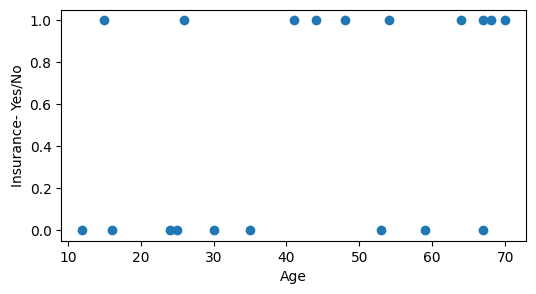

In [55]:
plt.figure(figsize=(6,3))
plt.scatter(df["Age"], df["Insurance"])
plt.xlabel("Age")
plt.ylabel("Insurance- Yes/No")
plt.show()

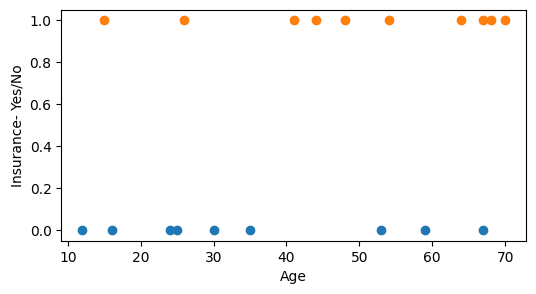

In [56]:
plt.figure(figsize=(6,3))
plt.scatter(df[df["Insurance"]==0]["Age"], df[df["Insurance"]==0]["Insurance"])
plt.scatter(df[df["Insurance"]==1]["Age"], df[df["Insurance"]==1]["Insurance"])
plt.xlabel("Age")
plt.ylabel("Insurance- Yes/No")
plt.show()

In [57]:
df["Age"]=df["Age"].astype("int")

In [58]:
df["Insurance"]=df["Insurance"].astype("int")

In [59]:
x=df.drop("Insurance", axis=1)
y=df["Insurance"]

In [60]:
x

,Age
1,12
2,15
3,16
4,24
5,25
6,26
7,30
8,35
9,41
10,44


In [61]:
y

1     0
2     1
3     0
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    0
18    1
19    1
Name: Insurance, dtype: int64

In [62]:
model=LogisticRegression()

In [63]:
model.fit(x,y)

LogisticRegression()

In [77]:
model.predict([[40]])

array([0])

In [66]:
model.predict([[68], [26]])

array([1, 0])

In [67]:
model.predict_proba([[45]])

array([[0.45118759, 0.54881241]])

In [68]:
model.predict_proba([[40]])

array([[0.50130574, 0.49869426]])

In [69]:
model.predict_proba([[68], [26]])

array([[0.24584118, 0.75415882],
       [0.63836921, 0.36163079]])

In [70]:
model.predict_proba([[31]])

array([[0.5907814, 0.4092186]])

In [73]:
m=model.coef_

In [74]:
c=model.intercept_

In [80]:
def sigmoid(x):
    return 1/ (1+np.exp(-(m*x+c)))

In [81]:
sigmoid(40)

array([[0.49869426]])

In [82]:
all_sigmoid_values=list(map(lambda x: sigmoid(x)[0][0], x["Age"]))

In [83]:
all_sigmoid_values

[np.float64(0.24390962389860119),
 np.float64(0.26684185036861613),
 np.float64(0.2747836466190628),
 np.float64(0.3432754166151976),
 np.float64(0.3523986266354264),
 np.float64(0.3616307872109277),
 np.float64(0.3995319057552736),
 np.float64(0.4486023395984362),
 np.float64(0.5087481917395897),
 np.float64(0.5388351767993453),
 np.float64(0.5784786929082236),
 np.float64(0.6265929115107465),
 np.float64(0.6359542647654057),
 np.float64(0.6811243356701391),
 np.float64(0.7231298280297896),
 np.float64(0.746626041116848),
 np.float64(0.746626041116848),
 np.float64(0.7541588158671988),
 np.float64(0.7687658899368993)]

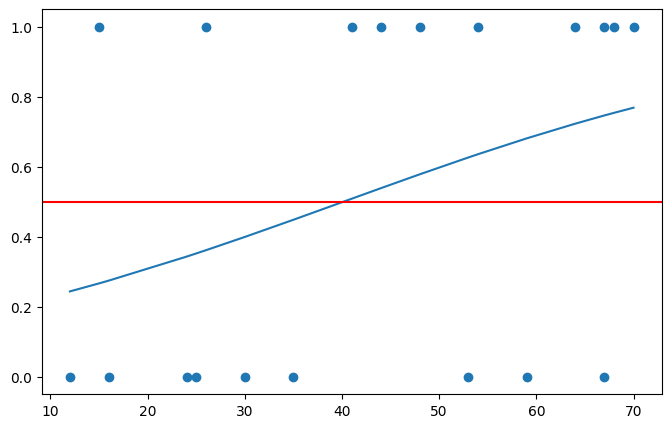

In [87]:
plt.figure(figsize=(8,5))
plt.scatter(df["Age"], df["Insurance"])
plt.plot(df["Age"], all_sigmoid_values)
plt.axhline(0.5, color="red")
plt.show()

In [88]:
y_pred=model.predict(x)

In [89]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [90]:
np.sum((y* np.log(y_pred))+((1-y)*np.log(1-y_pred)))

np.float64(-inf)